<a href="https://colab.research.google.com/github/vikrantIIITD2024/FashionAI/blob/main/Blah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pillow-avif-plugin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 20.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from PIL import Image
import pillow_avif
import numpy as np
from IPython.display import display

In [ ]:
%load_ext google.colab.data_table
df = pd.read_excel("/content/drive/MyDrive/META DATASET/Accessories/Accessories.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/META DATASET/Female Dresses.xlsx")
df2

Category Gender                Region AgeGroup  \
0    Ethnics      F                   Any    18-25   
1    Ethnics      F                   Any    18-25   
2    Ethnics      F                   Any    18-25   
3    Ethnics      F                   Any    18-25   
4    Ethnics      F                   Any    18-25   
..       ...    ...                   ...      ...   
295   Sarees      F  West Bengal, Kolkata    28-40   
296   Sarees      F  West Bengal, Kolkata    28-40   
297   Sarees      F  West Bengal, Kolkata    28-40   
298   Sarees      F  West Bengal, Kolkata    28-40   
299   Sarees      F  West Bengal, Kolkata    28-40   

                                  Occasion   BodyType  \
0                                   Diwali  Mesomerph   
1                                   Diwali  Mesomerph   
2                                   Diwali  Mesomerph   
3                                   Diwali  Mesomerph   
4                                   Diwali  Mesomerph   
..                                     ...        ...   
295  Durga Pooja, Doorga Pooja, Durga Puja  Mesomerph   
296  Durga Pooja, Doorga Pooja, Durga Puja  Mesomerph   
297  Durga Pooja, Doorga Pooja, Durga Puja  Mesomerph   
298  Durga Pooja, Doorga Pooja, Durga Puja  Mesomerph   
299  Durga Pooja, Doorga Pooja, Durga Puja  Mesomerph   

                                                 Green  \
0    https://assets.myntassets.com/dpr_2,q_60,w_210...   
1    https://assets.myntassets.com/dpr_2,q_60,w_210...   
2    https://assets.myntassets.com/dpr_2,q_60,w_210...   
3    https://assets.myntassets.com/dpr_2,q_60,w_210...   
4    https://assets.myntassets.com/dpr_2,q_60,w_210...   
..                                                 ...   
295                                                  0   
296                                                  0   
297                                                  0   
298                                                  0   
299                                                  0   

                                                  Pink  \
0    https://assets.myntassets.com/dpr_2,q_60,w_210...   
1    https://assets.myntassets.com/dpr_2,q_60,w_210...   
2    https://assets.myntassets.com/dpr_2,q_60,w_210...   
3    https://assets.myntassets.com/dpr_2,q_60,w_210...   
4    https://assets.myntassets.com/dpr_2,q_60,w_210...   
..                                                 ...   
295                                                  0   
296                                                  0   
297                                                  0   
298                                                  0   
299                                                  0   

                                                  Blue  \
0    https://assets.myntassets.com/dpr_2,q_60,w_210...   
1    https://assets.myntassets.com/dpr_2,q_60,w_210...   
2    https://assets.myntassets.com/dpr_2,q_60,w_210...   
3    https://assets.myntassets.com/dpr_2,q_60,w_210...   
4    https://assets.myntassets.com/dpr_2,q_60,w_210...   
..                                                 ...   
295                                                  0   
296                                                  0   
297                                                  0   
298                                                  0   
299                                                  0   

                                                 Black  \
0    https://assets.myntassets.com/dpr_2,q_60,w_210...   
1    https://assets.myntassets.com/dpr_2,q_60,w_210...   
2    https://assets.myntassets.com/dpr_2,q_60,w_210...   
3    https://assets.myntassets.com/dpr_2,q_60,w_210...   
4    https://assets.myntassets.com/dpr_2,q_60,w_210...   
..                                                 ...   
295                                                  0   
296                                                  0   
297                                                  0   

In [ ]:
def loadImages(names):
  base = '/content/drive/MyDrive/META DATASET/Accessories/'
  images = []
  for i in names:
    img = Image.open(base+i)
    images.append(img)
  return images

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:
trainImages = []
trainLabel = []
for i in range(len(imagesDataSet)-4):
  trainImages.append(np.array(imagesDataSet[i][0]))
  trainLabel.append(imagesDataSet[i][1])

In [ ]:
targetShape = (850, 850)
print(targetShape)
bleh = []
for img in trainImages:
  i = tf.image.resize(img, targetShape)
  bleh.append(i)

(850, 850)


In [ ]:
BATCH_SIZE=5
BUFFER_SIZE=20

tfDf = tf.data.Dataset.from_tensor_slices(bleh).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

<_BatchDataset element_spec=TensorSpec(shape=(None, 850, 850, 3), dtype=tf.float32, name=None)>

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

tf.Tensor(
[[-1.8262563   0.15891856 -0.56795454  0.5141647   0.89872164 -0.93455017
   0.11471412  0.13812289  0.59890413  0.70763135 -0.73549247  2.6296568
  -0.3584492  -0.9480258  -0.6590002   0.33311448 -0.4519917  -0.2679593
   0.5301592   1.6159211   0.24030757 -0.9744661   0.22681531 -0.6202047
   0.38858527 -1.1840699   0.5605902  -1.4464312  -0.09995864  0.14184007
  -0.63591576  1.0031377   0.07059771  0.7188106  -0.6206258  -0.16234171
   1.1363355  -0.42836645 -0.32914492  0.9740708  -0.7924881  -0.15775281
  -0.22389399 -0.22251806 -1.3405844  -0.495194   -0.41126907  1.1910446
   2.2537847   0.3440955  -0.04643138  0.68293715 -1.0412748  -0.8863243
   0.35971066 -0.29525614  0.92071146 -0.15905403  0.21024416  0.19279939
  -0.88930804 -0.48597878 -1.172062   -0.19484575 -1.4975108  -0.83538634
   0.36560324 -1.2943252   1.7864945  -1.3047378   0.74008894  1.2290285
   0.11522479  1.5780944   0.14476421 -0.50462174 -1.3655558   1.2901943
   2.3963406   1.636928    0.58706

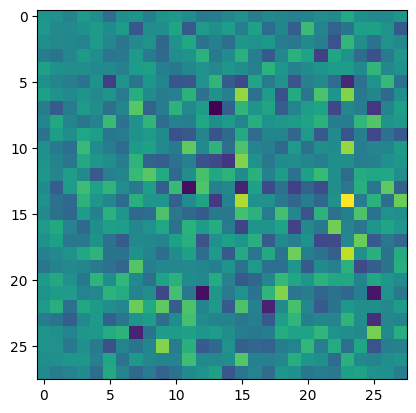

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
print(noise)
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
!pip install nltk

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('state_union')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import re

In [ ]:
def main(sample_text):
  # Define lists for regions, age groups, and occasions
  regions_in_india = ["delhi", "mumbai", "chennai", "kolkata", "bangalore", "hyderabad", "jaipur", "lucknow", "chandigarh"]
  age_groups = {
      "teenager": (13, 17),
      "young adult": (18, 24),
      "pre-adult": (25, 35),
      "adult": (35, 45),
      "elder": (45, 55),
      "old": (55, 65)
  }
  occasions = ["doorgapooja", "diwali", "groom", "wedding", "eid", "party", "interview", "farewell", "sports", "walking", "running", "college", "bride", "must have"]

  # Sample text
  # sample_text = "A boy looking for college outfit in Delhi Region"


  bodyType = ["ectomorph", "mesomorph" ,"endomorph"]

  # Tokenize the text
  tokens = word_tokenize(sample_text.lower())

  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
  # print("filtered tokens: ", filtered_tokens)

  # Part-of-speech tagging
  tagged_words = pos_tag(filtered_tokens)
  print("tagged words: ",tagged_words)

  # Initialize variables
  region = "any"
  age_group = "any"
  occasion = "any"
  gender = None
  bodyType = "Mesomorph"

  # Extract information based on part-of-speech tags
  for word, tag in tagged_words:
      if word in regions_in_india:
          region = word
      elif word in occasions:
          occasion = word
      elif word in bodyType:
          bodyType = word

  if "male" in sample_text:
      gender = 'M'
  if "female" in sample_text:
      gender = 'F'

  if "boy" in sample_text:
      gender = 'M'
  if "girl" in sample_text:
      gender = 'F'


  if "men" in sample_text:
      gender = 'M'
  if "women" in sample_text:
      gender = 'F'

  if "man" in sample_text:
      gender = 'M'
  if "woman" in sample_text:
      gender = 'F'

  if "gentleman" in sample_text:
      gender = 'M'
  if "lady" in sample_text:
      gender = 'F'



  # Check for specific phrases and map them to age groups
  # age group check flaw
  if "young" in sample_text:
      age_group = age_groups["young adult"]
  elif "young-old" in sample_text:
      age_group = age_groups["pre-adult"]
  else:
    # Convert the list of keywords to a space-separated string
    text = sample_text

    # Define a regular expression pattern to match the age
    age_pattern = r'\b\d+\b'

    # Use re.findall to find all occurrences of the pattern in the text
    ages = re.findall(age_pattern, text)

    # If there are multiple occurrences, you can take the first one
    if ages:
        age = int(ages[0])
        # print(f"The age is: {age} years old")
        for i in age_groups.values():
          print(f"Got values: {i}")
          if (age >= i[0] and age < i[1]):
            age_group = list(age_groups.keys())[list(age_groups.values()).index(i)]
            # print(f"Setting age_group: {age_group}")
            break
    else:
        print("No age found in the text")

  # Print the extracted information
  print("Region:", region)
  print("Age Group:", age_group)
  print("Occasion:", occasion)
  print("Gender:", gender)
  return [region, age_group, occasion, gender]

In [ ]:
def filter(params, df):
  # print(f"region: {params[0].capitalize()}, occassion: {params[2].capitalize()}, gender: {params[3]}")
  answer = pd.DataFrame()
  # answer = df[(df["Region"].isin([params[0].capitalize()]) & (params[2].capitalize() == df["Occasion"]) & (df["Gender"] == params[3]))]
  for i in range(len(df)):
    # print(f"Got row: region: {df.loc[i, 'Region']}, occ: {df.loc[i, 'Occasion']}, gender: {df.loc[i, 'Gender']}")
    if (df.loc[i, "Region"] == params[0].capitalize()):
      # print("correct region")
      if (df.loc[i, "Occasion"] == params[2].capitalize()):
        # print("correct occasion")
        if (df.loc[i, "Gender"] == params[3]):
          # print("Correct gender")
          answer = answer.append([df.loc[i]])
  # print("Got answer: ", answer)
  return answer

In [ ]:
def extractImages(df):
  imageNames = []
  nonzero= df[df != 0].stack().values
  # print(nonzero)
  for i in nonzero:
    if (i.endswith(".jpg") and i not in imageNames):
      imageNames.append(i)
  return imageNames

In [ ]:
import urllib.request

In [ ]:
def urlLoadImages(urls):
  for i in range(len(urls)):
    filename = f'/content/ranfile{i}.jpg'
    with urllib.request.urlopen(urls[i]) as url:
        with open(filename, 'wb') as f:
            f.write(url.read())

    img = Image.open(filename)

    display(img)

tagged words:  [('27', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('woman', 'NN'), ('kolkata', 'VBZ'), ('looking', 'VBG'), ('saari', 'NNS'), ('doorgapooja', 'NN')]
Got values: (13, 17)
Got values: (18, 24)
Got values: (25, 35)
Region: kolkata
Age Group: pre-adult
Occasion: doorgapooja
Gender: F
Got image names:  ['https://assets.myntassets.com/dpr_2,q_60,w_210,c_limit,fl_progressive/assets/images/24345242/2023/8/4/25c602ea-edf4-48c9-b11f-dcc45cd737091691161766947AnoukWomensFancyKanjivaramArtSilkSareeWithUnstitchedBlousePi1.jpg', 'https://assets.myntassets.com/dpr_2,q_60,w_210,c_limit,fl_progressive/assets/images/productimage/2021/5/5/a8e399bd-b085-4203-8c0d-8c58110748631620190931021-1.jpg', 'https://assets.myntassets.com/dpr_2,q_60,w_210,c_limit,fl_progressive/assets/images/23991252/2023/7/12/3c73373c-7c0a-4cd1-a767-5ea2c82afd801689175494704KALINIOrangeBlackEmbellishedSequinnedPureGeorgetteHeavyWorkS1.jpg', 'https://assets.myntassets.com/dpr_2,q_60,w_210,c_limit,fl_progressive/assets/imag

<ipython-input-100-1b3c5393e100>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  answer = answer.append([df.loc[i]])
<ipython-input-100-1b3c5393e100>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  answer = answer.append([df.loc[i]])
<ipython-input-100-1b3c5393e100>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  answer = answer.append([df.loc[i]])
<ipython-input-100-1b3c5393e100>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  answer = answer.append([df.loc[i]])
<ipython-input-100-1b3c5393e100>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

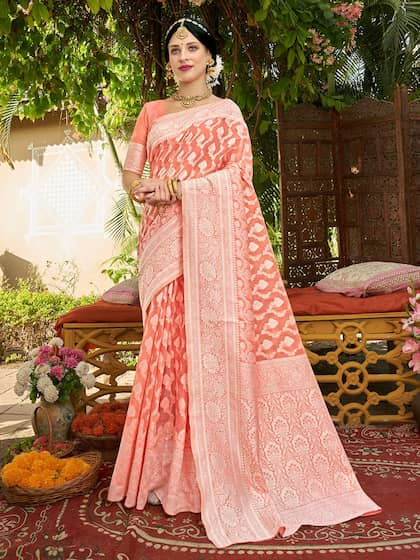

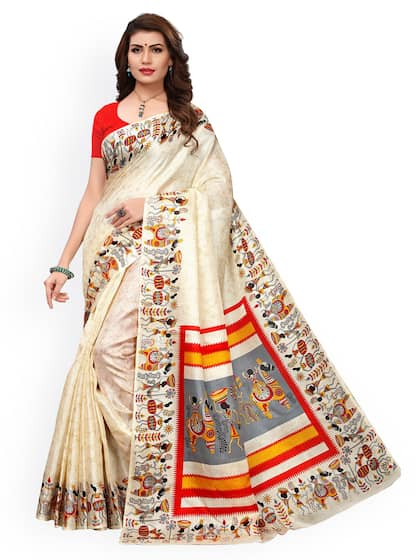

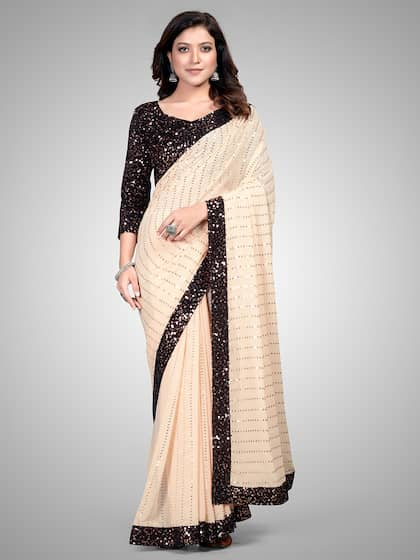

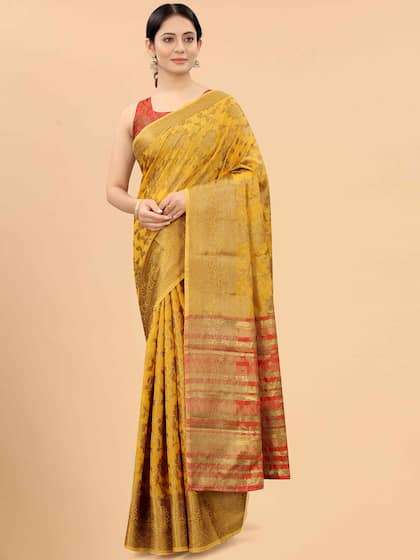

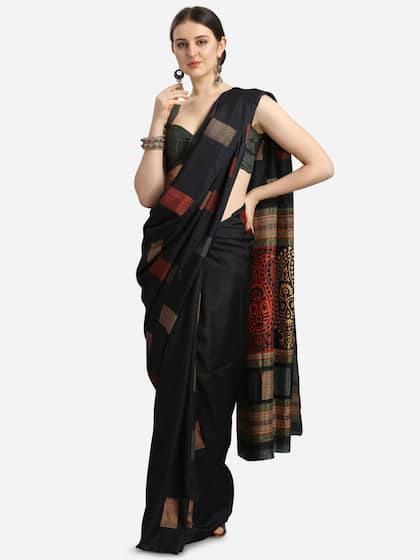

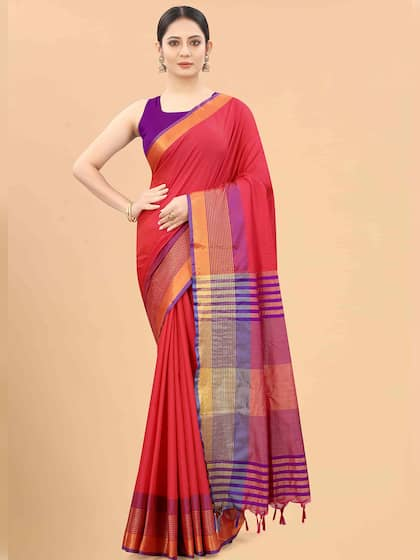

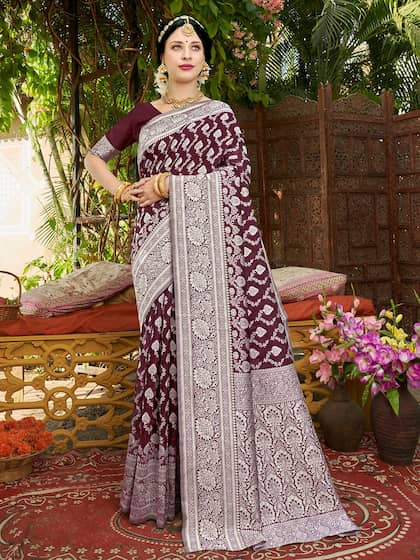

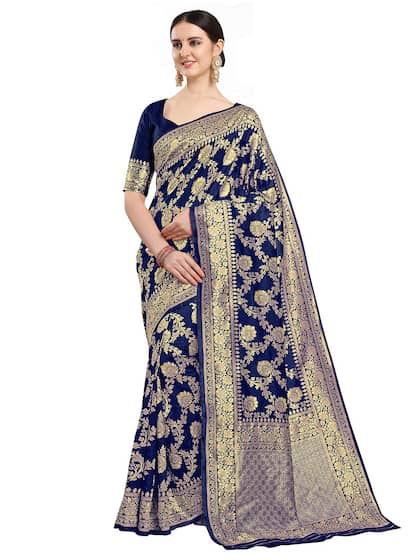

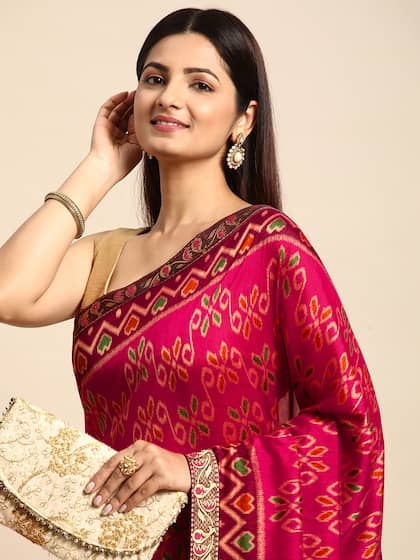

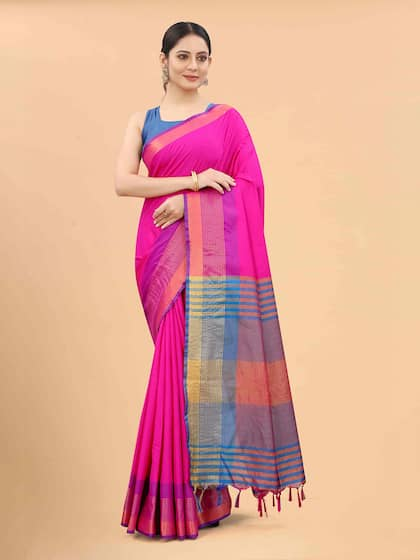

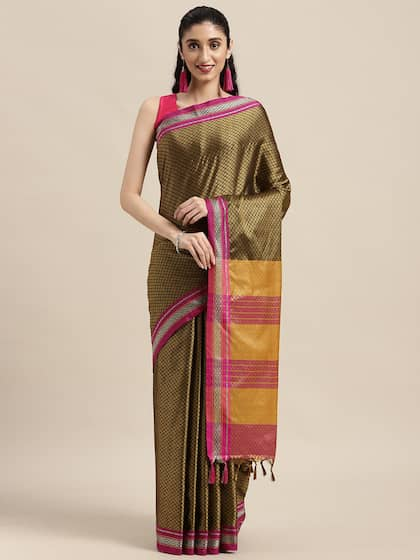

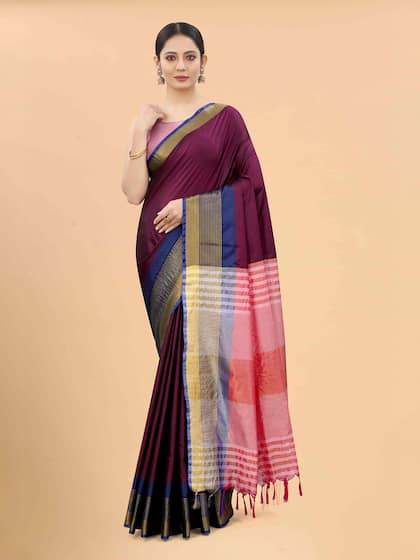

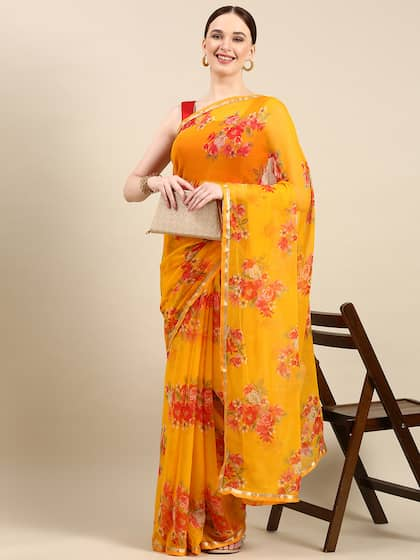

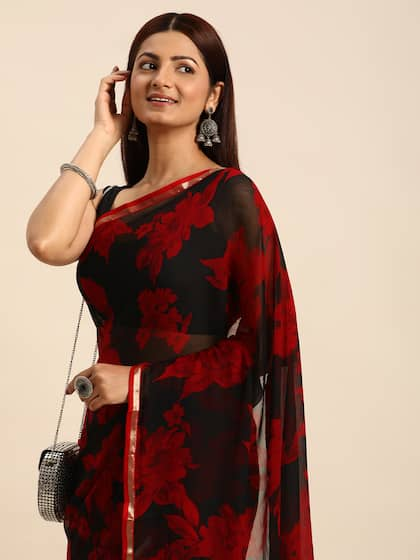

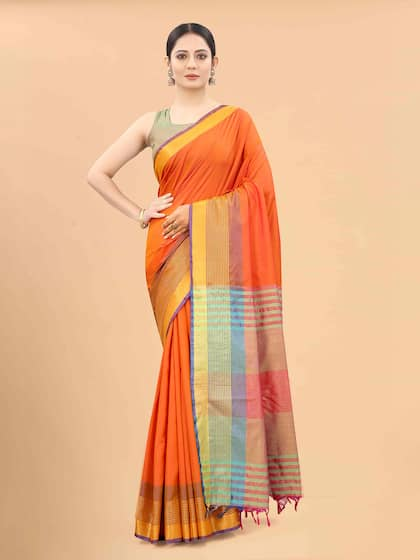

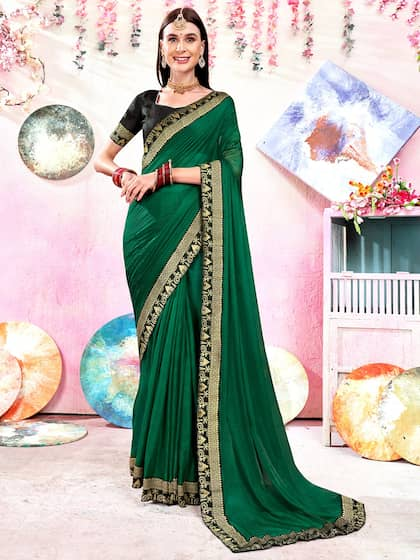

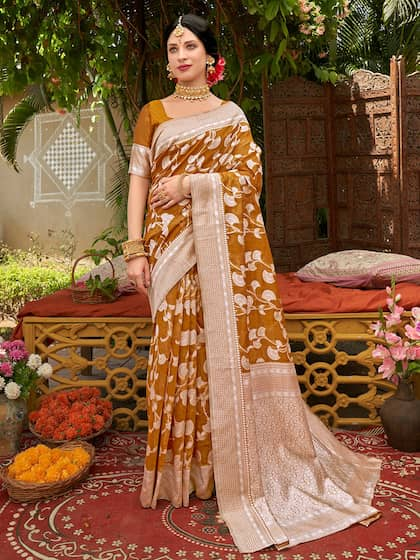

In [ ]:
# print(df.head())
params = main("A 27 years old woman from Kolkata looking for saari for DoorgaPooja")
# print(f"df2.head: {df2}")
# print(params)
adf = filter(params, df2)
recImages = extractImages(adf)
print("Got image names: ", recImages)
# imgfiles = loadImages(recImages)
# # for i in imgfiles:
# #   display(i)
urlLoadImages(recImages)